In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline


#We will read the Data

In [ ]:
url = 'https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true'
df = pd.read_excel(url, sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df.shape

(5630, 20)

In [ ]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.00000,3774.000000,3774.000000,3774.000000,3774.000000
mean,53017.994966,0.167197,8.776895,1.707737,15.743773,2.981187,3.754107,3.056439,4.216481,0.282194,15.72761,1.719661,2.825384,4.526232,164.213590
std,1608.979289,0.373201,7.678508,0.936725,8.594330,0.722158,1.025233,1.389730,2.562142,0.450127,3.62991,1.674508,2.467597,3.371310,24.093966
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.00000,0.000000,1.000000,0.000000,0.000000
25%,51656.250000,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.00000,1.000000,1.000000,2.000000,148.485000
50%,53160.500000,0.000000,8.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.00000,1.000000,2.000000,3.000000,160.050000
75%,54394.500000,0.000000,13.000000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.00000,2.000000,3.000000,7.000000,178.010000
max,55630.000000,1.000000,51.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.00000,16.000000,16.000000,46.000000,324.990000


In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,3143
1,631


In [ ]:
churn_rate = df['Churn'].value_counts()/len(df)*100
df['Churn'].value_counts()/len(df)*100


,count
Churn,
0,83.280339
1,16.719661


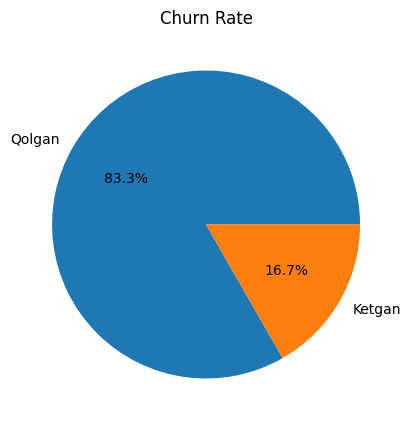

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(churn_rate, labels=['Qolgan', 'Ketgan'], autopct='%1.1f%%')
plt.title('Churn Rate')
plt.show()

#Tahlil

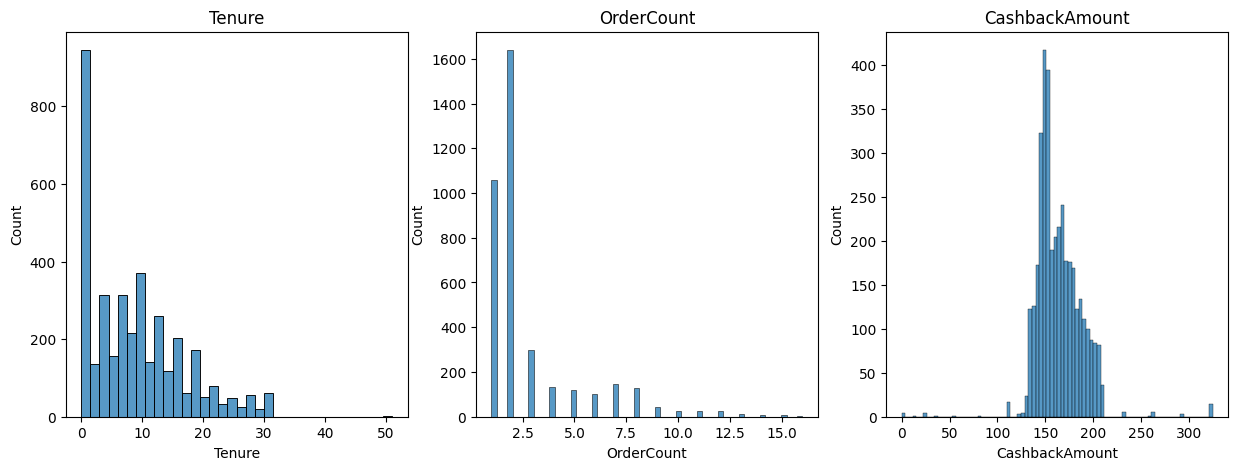

In [ ]:
fig, axes=plt.subplots(1,3, figsize=(15,5))

#Tenure

sns.histplot(data=df, x='Tenure', ax=axes[0])
axes[0].set_title('Tenure')

#OrderCount

sns.histplot(data=df, x='OrderCount', ax=axes[1])
axes[1].set_title('OrderCount')

#Cashback

sns.histplot(data=df, x='CashbackAmount', ax=axes[2])
axes[2].set_title('CashbackAmount')

plt.show()

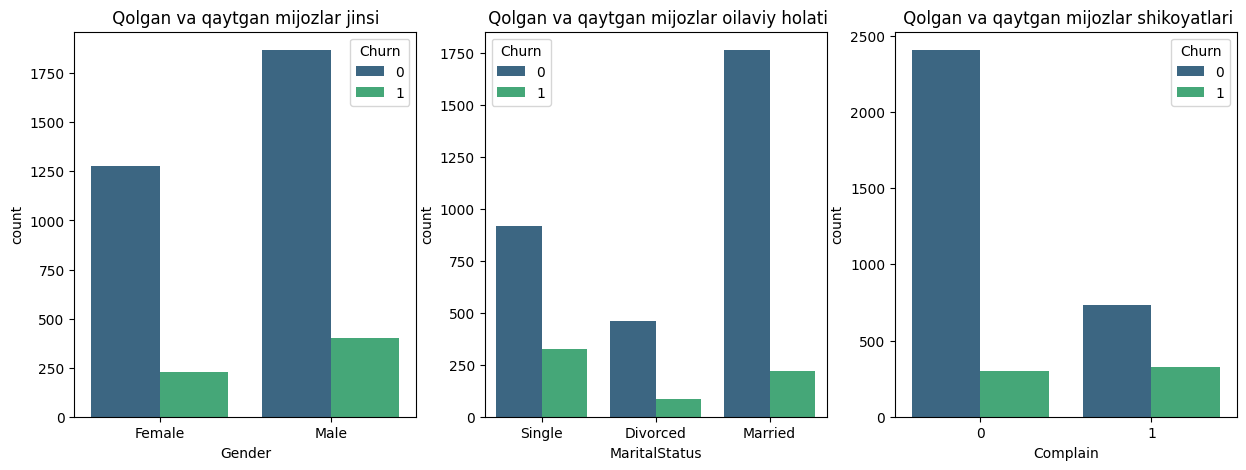

In [ ]:
fig , axes=plt.subplots(1,3, figsize=(15,5))

sns.countplot(data=df, x='Gender', hue='Churn', palette='viridis', ax=axes[0])
axes[0].set_title(' Qolgan va qaytgan mijozlar jinsi ')

sns.countplot(data=df, x='MaritalStatus', hue='Churn', palette='viridis', ax=axes[1])
axes[1].set_title(' Qolgan va qaytgan mijozlar oilaviy holati')


sns.countplot(data=df, x='Complain', hue='Churn', palette='viridis', ax=axes[2])
axes[2].set_title(' Qolgan va qaytgan mijozlar shikoyatlari')

plt.show()

In [ ]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate correlation with 'Churn' column for numerical columns only
correlation = numerical_df.corrwith(df['Churn']).abs().sort_values(ascending=False)

print(correlation)

Churn                          1.000000
Tenure                         0.340013
Complain                       0.238137
NumberOfDeviceRegistered       0.149041
DaySinceLastOrder              0.139254
SatisfactionScore              0.095759
WarehouseToHome                0.087318
NumberOfAddress                0.076336
CityTier                       0.073858
HourSpendOnApp                 0.060845
CashbackAmount                 0.058756
CustomerID                     0.031617
OrderAmountHikeFromlastYear    0.017193
CouponUsed                     0.010982
OrderCount                     0.001962
dtype: float64


#Malumotlarga Ishlov Berish

In [ ]:
#df dagi mavjud bo'lmagan qiymatlar

print( f'Mavjud bolmagan qiymatlar soni: {df.isnull().sum().sum()}')

#mavjud bo'lmagan qatorlar soni

missing_rows = df.isnull().any(axis=1).sum()
print(f'Mavjud bolmagan qatorlar soni: {missing_rows}')
#qatorlar nisbati

missing_rows_percentage = (missing_rows / len(df)) * 100
print(f'Qatorlar nisbati: {missing_rows_percentage:.2f}%')


Mavjud bolmagan qiymatlar soni: 0
Mavjud bolmagan qatorlar soni: 0
Qatorlar nisbati: 0.00%


#ML ga tayyorgarlik

In [ ]:
 #Matnli ustunlarni songa o'tqazamiz

 encoded=pd.get_dummies(df)
 encoded.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,False,False,False,True,False,False,False,False,False,True
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,True,False,False,True,False,False,False,False,False,True
5,50006,1,0.0,1,22.0,3.0,5,5,2,1,...,False,False,False,False,False,True,False,False,False,True
11,50012,1,11.0,1,6.0,3.0,4,3,10,1,...,True,True,False,False,False,False,False,False,False,True
12,50013,1,0.0,1,11.0,2.0,3,3,2,1,...,True,False,False,False,True,False,False,False,False,True


In [ ]:
scaler=StandardScaler()
X=scaler.fit_transform(encoded)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded['Churn'], test_size=0.2, random_state=42)

#ML

In [ ]:
#modelni yaratamiz

LR_model=LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       648
           1       1.00      1.00      1.00       107

    accuracy                           1.00       755
   macro avg       1.00      1.00      1.00       755
weighted avg       1.00      1.00      1.00       755

Model aniqligi:  1.0


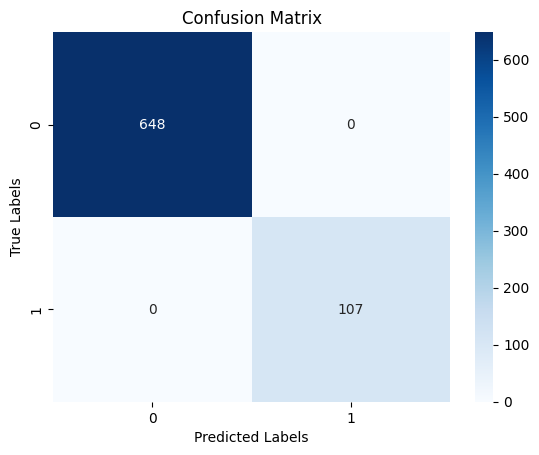

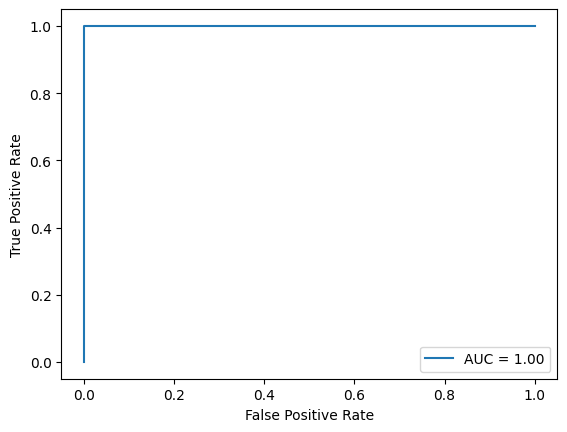

In [ ]:
y_pred=LR_model.predict(X_test)

# Convert continuous predictions to binary predictions (using a threshold)
threshold = 0.5  # Adjust this threshold as needed
y_pred_binary = (y_pred > threshold).astype(int)

# Now use classification metrics on the binary predictions
print(metrics.classification_report(y_pred_binary, y_test))
print("Model aniqligi: " , metrics.accuracy_score(y_pred_binary, y_test))

#confusion matrix

conf_mat=confusion_matrix(y_pred_binary, y_test)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#ROC curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc_score = metrics.auc(fpr, tpr)
display=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score)
display.plot()
plt.show()

In [ ]:
#XGB boost modeli

xgb_model=XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       648
           1       1.00      1.00      1.00       107

    accuracy                           1.00       755
   macro avg       1.00      1.00      1.00       755
weighted avg       1.00      1.00      1.00       755

Model aniqligi:  1.0


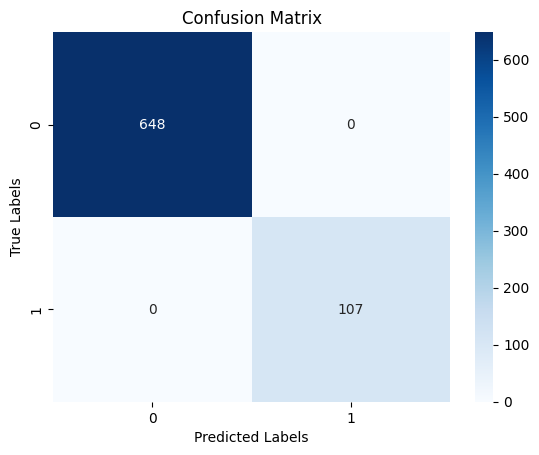

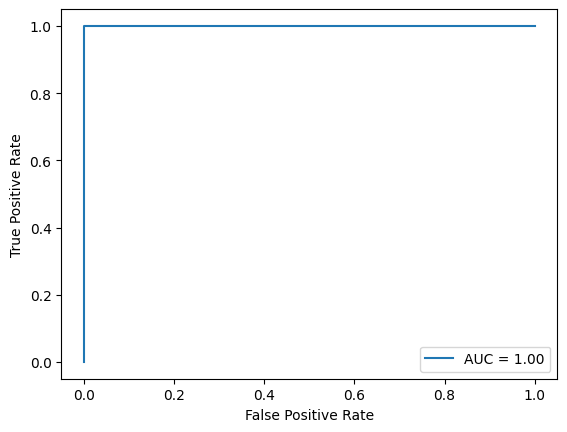

In [ ]:
y_pred=xgb_model.predict(X_test)

# Convert continuous predictions to binary predictions (using a threshold)
threshold = 0.5  # Adjust this threshold as needed
y_pred_binary = (y_pred > threshold).astype(int)

# Now use classification metrics on the binary predictions
print(metrics.classification_report(y_pred_binary, y_test))
print("Model aniqligi: " , metrics.accuracy_score(y_pred_binary, y_test))

#confusion matrix

conf_mat=confusion_matrix(y_pred_binary, y_test)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#ROC curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc_score = metrics.auc(fpr, tpr)
display=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score)
display.plot()
plt.show()